<a href="https://colab.research.google.com/github/uaeca-jr/HelloWorld.e02/blob/master/FAIM_G02_FinalProject_UpdatedCleaning_ThreeModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1 & 2: Check environment + Import Packages

In [ ]:
# Turn on multi-threading on your computer for faster calculation
%env OMP_NUM_THREADS = 4


# Step 1: Check conda environment and installed packages and libaries

# Step 2: Load the necessary packages and libaries

import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience and so on
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Ignore Warnings: Keep Notebook "cleaner"
import warnings
warnings.filterwarnings("ignore")

env: OMP_NUM_THREADS=4


In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

# STEP 3: Import file(s)

In [ ]:
# Step 3: Import file of UK Companies, note that name and format are altered for convinience and to comply with lack of pyxlsb
filename = 'COMPANIES_UK.xls'

df = pd.read_excel(filename)

# Next three lines are a set of exploratory steps to understand what data there is in the file

#TODO: Import data for Dutch companies and repeat the same procedures as below



In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

# STEP 4: Cleaning Data

In [ ]:
#Change data types 1:  int for COMPANY_SUBSIDIARIES, EMPLOYEE_COUNT(ALL), MANAGEMENT_COUNT
#Change data types 2:  float for Operating Revenues, Net Income, Equity, Assets, and EBITDA

# These changes are certainly worthless for Nace, BVD and ORBIS ID

def cleaning_data(df):

    #Changing data type to int, and fill up n.a.'s

    int_columns = ['COMPANY_SUBSIDIARIES', 'EMPLOYEE_COUNT', 'EMPLOYEE_COUNT-1','EMPLOYEE_COUNT-2',
                   'EMPLOYEE_COUNT-3','MANAGEMENT_COUNT']  # List your columns here

    float_columns = ['OPERATING_REVENUE','OPERATING_REVENUE-1','OPERATING_REVENUE-2','OPERATING_REVENUE-3',
                     'NET_INCOME','NET_INCOME-1','NET_INCOME-2','NET_INCOME-3', 'EQUITY','EQUITY-1',
                     'EQUITY-2','EQUITY-3','ASSETS','ASSETS-1','ASSETS-2','ASSETS-3', 'EBITDA','EBITDA-1',
                     'EBITDA-2','EBITDA-3']

    for col in int_columns:
      df[col] = df[col].fillna(0)
      df[col] = df[col].replace('n.a.', 0)
      df[col] = pd.to_numeric(df[col], downcast='integer')
      df[col] = df[col].astype('int')

    for col in float_columns:
      df[col] = df[col].fillna(0)
      df[col] = df[col].replace('n.a.', 0)
      df[col] = df[col].astype('float')


cleaning_data(df)



In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#With the table properly formated, then we proceed to remove unneeded columns from the model and alter the website column to a binary
#Columns that are to be deleted: COMPANY_NAME, NACE_CODE, NACE_CODE_DESCRIPTION, BVD_ID, ORBIS_ID, REGION

columns_to_drop = ['COMPANY_NAME','NACE_CODE','NACE_CODE_DESCRIPTION','BVD_ID','ORBIS_ID','REGION']

# Drop the above columns from the df
df.drop(labels=columns_to_drop, axis=1, inplace=True)


#Change website column into a binary (1 or 0)
df['WEBSITE'] = df['WEBSITE'].apply(lambda x: 1 if x not in [None, np.nan, ''] else 0)

In [ ]:
df.info()

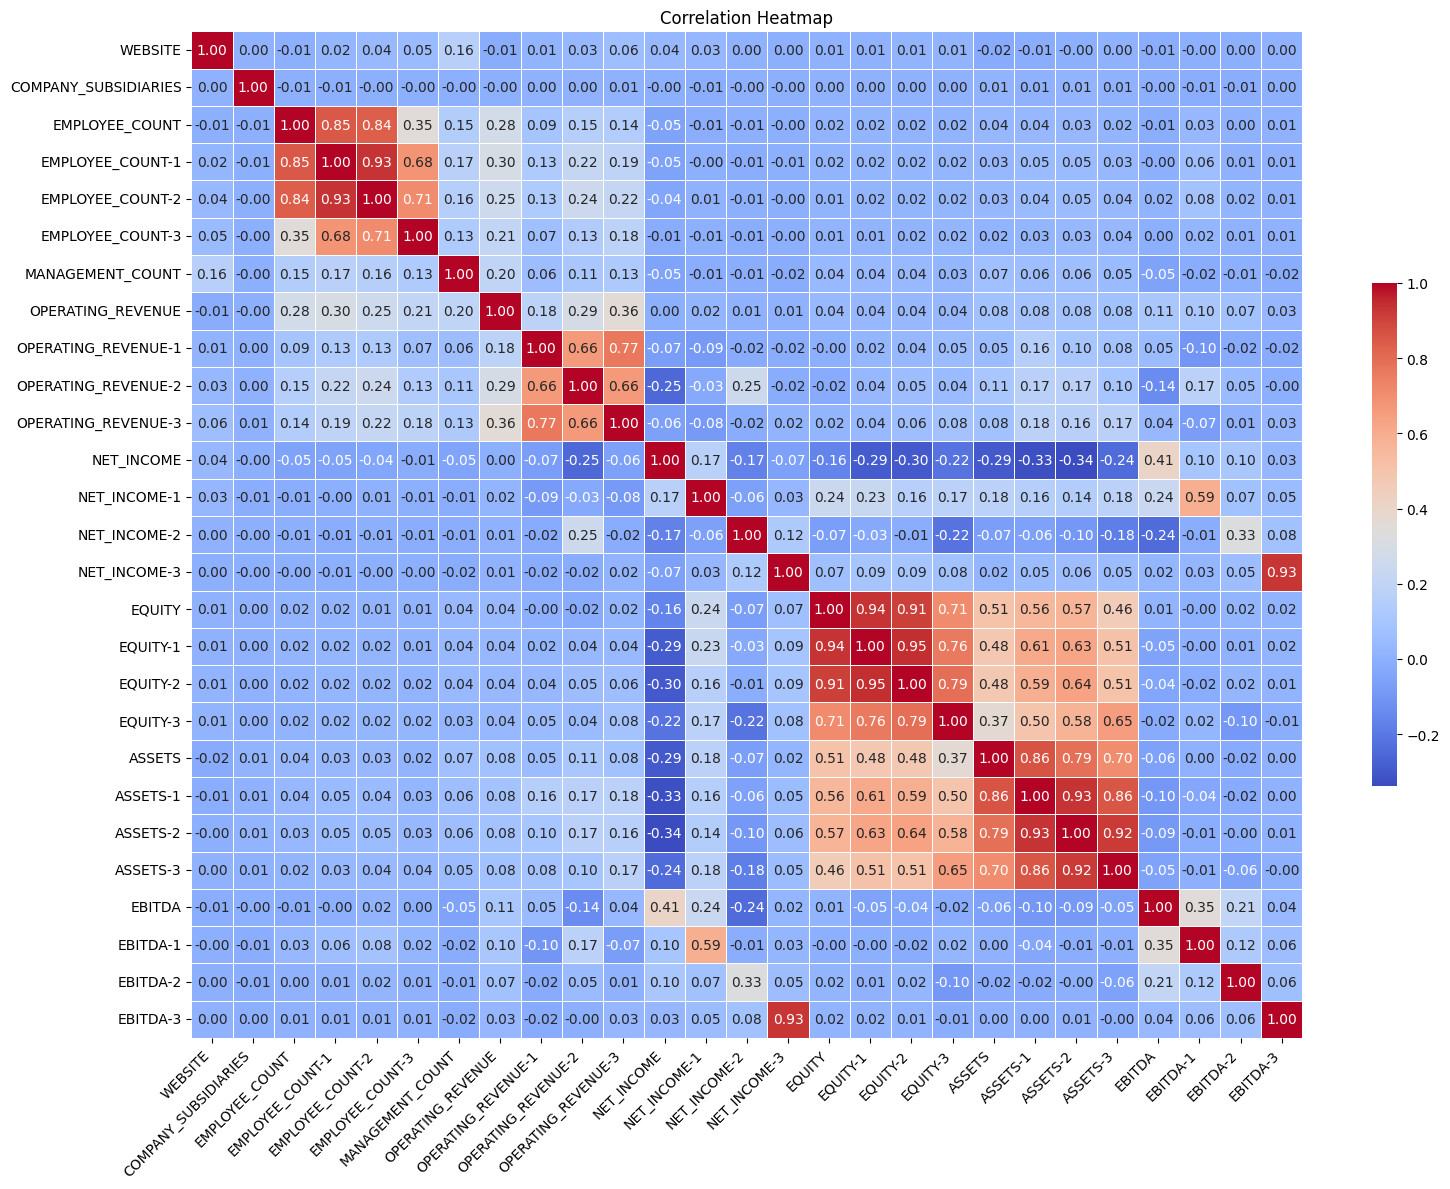

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})

# Enhance the heatmap for better readability
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()

# Step 5: Exploratory

Check for correlations, remove useless columns such as NACE, etc

In [ ]:
x = df[['NET_INCOME','NET_INCOME-1','NET_INCOME-2','NET_INCOME-3','ASSETS', 'ASSETS-1','ASSETS-2','ASSETS-3','EQUITY','EQUITY-1','EQUITY-2','EQUITY-3','EMPLOYEE_COUNT','EMPLOYEE_COUNT-1','EMPLOYEE_COUNT-2','EMPLOYEE_COUNT-3','OPERATING_REVENUE','OPERATING_REVENUE-1','OPERATING_REVENUE-2','OPERATING_REVENUE-3']]  # Features
y = df['EBITDA']  # Target variable

In [ ]:
np.random.seed(77300)

# split the data randomly into 80% train and 20% test samples
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)


# Step 6: Split data


In [ ]:
## Try String replace ##
df = pd.DataFrame(X_train)
df.replace("n.a.", 0.0, inplace=True)

df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64','bool']).columns, drop_first = True)
#df = pd.get_dummies(df, columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], drop_first = True)

# Remove the limit on the number of columns (by default only 20 are shows)
pd.options.display.max_columns = None

df.head()

df = pd.DataFrame(Y_train)
df.replace("n.a.", 0.0, inplace=True)

df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64','bool']).columns, drop_first = True)
#df = pd.get_dummies(df, columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], drop_first = True)

# Remove the limit on the number of columns (by default only 20 are shows)
pd.options.display.max_columns = None

df.head()

,EBITDA
0,0.033903
1,8.281017
2,2.513321
3,2.157912
4,5.323544


# Step 7: Choose evaluation criteria

In [ ]:
#Confusion matrix and ROCM to evaluate model performance


# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

# Step 8: Train and evaluate model

XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model
xgb_reg.fit(x_train, y_train)

# Predict on validation set
preds = xgb_reg.predict(x_test)

# Evaluate the model
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE: {rmse}")

RMSE: 3.9668055009994667


In [ ]:
#Confusion matrix and ROC

binary_preds = np.where((preds >= 1) & (preds <= 4), 1, 0)

binary_y_test = np.where((y_test >= 1) & (y_test <= 4), 1, 0)

cm = confusion_matrix(binary_y_test, binary_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[8036 1412]
 [1571 2088]]


In [ ]:
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

Metrics of the logistic regression model: 

Confusion matrix: 
[[8036 1571]
 [1412 2088]]
                                   Accuracy: 0.7724116884107729
                   SENSITIVITY (aka RECALL): 0.5706477179557256
                 SPECIFICITY (aka FALL-OUT): 0.8505503810330228
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.5965714285714285
                 NEGATIVE PREDICTIVE VALUE): 0.8364734048089935


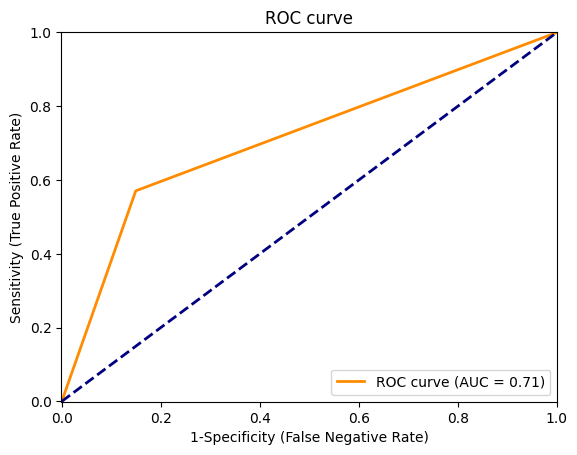

 AUC: 0.7105990494943742


In [ ]:
# Lets look at the model metrics
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(binary_y_test, binary_preds))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(binary_y_test, binary_preds)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(binary_y_test, binary_preds)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(binary_y_test, binary_preds)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(binary_y_test, binary_preds)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(binary_y_test, binary_preds)))

plot_roc(binary_y_test,binary_preds)
print(" AUC: " + str(roc_auc_score(binary_y_test, binary_preds)))


# Testing with NL Companies data


Metrics of the logistic regression model: 

Confusion matrix: 
[[1001 1323]
 [ 485  154]]
                                   Accuracy: 0.38980762740465746
                   SENSITIVITY (aka RECALL): 0.10426540284360189
                 SPECIFICITY (aka FALL-OUT): 0.6736204576043069
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.24100156494522693
                 NEGATIVE PREDICTIVE VALUE): 0.4307228915662651


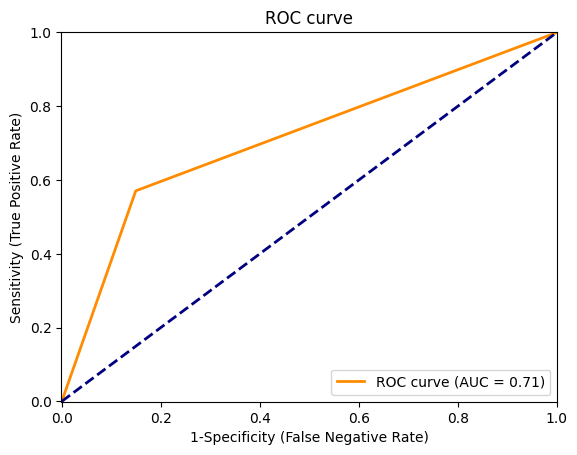

 AUC: 0.7105990494943742


In [ ]:
filename2 = 'COMPANIES_NL_Test.xlsx'

df_NL_TEST = pd.read_excel(filename2)

cleaning_data(df_NL_TEST)

x_NL_TEST = df_NL_TEST[['NET_INCOME','NET_INCOME-1','NET_INCOME-2','NET_INCOME-3','ASSETS', 'ASSETS-1','ASSETS-2','ASSETS-3','EQUITY','EQUITY-1','EQUITY-2','EQUITY-3','EMPLOYEE_COUNT','EMPLOYEE_COUNT-1','EMPLOYEE_COUNT-2','EMPLOYEE_COUNT-3','OPERATING_REVENUE','OPERATING_REVENUE-1','OPERATING_REVENUE-2','OPERATING_REVENUE-3']]  # Features
y_NL_TEST = df_NL_TEST['EBITDA']  # Target variable


preds_NL_TEST = xgb_reg.predict(x_NL_TEST)


binary_preds_NL_TEST = np.where((preds_NL_TEST >= 1) & (preds_NL_TEST <= 4), 1, 0)

binary_y_test_NL_TEST = np.where((y_NL_TEST >= 1) & (y_NL_TEST <= 4), 1, 0)

# Lets look at the model metrics
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(binary_y_test_NL_TEST, binary_preds_NL_TEST))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(binary_y_test_NL_TEST, binary_preds_NL_TEST)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(binary_y_test_NL_TEST, binary_preds_NL_TEST)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(binary_y_test_NL_TEST, binary_preds_NL_TEST)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(binary_y_test_NL_TEST, binary_preds_NL_TEST)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(binary_y_test_NL_TEST, binary_preds_NL_TEST)))

plot_roc(binary_y_test,binary_preds)
print(" AUC: " + str(roc_auc_score(binary_y_test, binary_preds)))


CLASSIFIER

In [ ]:

from tensorflow.keras.utils import to_categorical

X = df[['NET_INCOME','NET_INCOME-1','NET_INCOME-2','NET_INCOME-3','ASSETS', 'ASSETS-1','ASSETS-2','ASSETS-3','EQUITY','EQUITY-1','EQUITY-2','EQUITY-3','EMPLOYEE_COUNT','EMPLOYEE_COUNT-1','EMPLOYEE_COUNT-2','EMPLOYEE_COUNT-3','OPERATING_REVENUE','OPERATING_REVENUE-1','OPERATING_REVENUE-2','OPERATING_REVENUE-3']]  # Features
Y = df['EBITDA']  # Target variable

# Discretize EBITDA into categories (e.g., Low, Medium, High)
ebitda_bins = [-np.inf, 1, 4, np.inf]  # Define bins
ebitda_labels = [0 , 1 , 2]  # Define labels corresponding to your bins

# Categorize EBITDA values into bins
df['EBITDA_Category'] = pd.cut(df['EBITDA'], bins=ebitda_bins, labels=ebitda_labels, right=False, include_lowest=True)

# Check the distribution of bins
print(df['EBITDA_Category'].value_counts())

print(df['EBITDA'].describe())
print(df['EBITDA'].min(), df['EBITDA'].max())

# Convert categories to one-hot encoding
Y = to_categorical(df['EBITDA_Category'])
print (Y)

# Prepare feature matrix Y (excluding 'EBITDA' and 'EBITDA_Category' columns)
#Y = df.drop(['EBITDA','EBITDA_Category'], axis=1).values

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


models = {}
model_name = "Neural_Network"
# conda install tensorflow keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#!pip install keras
#!pip install keras==2.12.0

#!pip uninstall tensorflow
#!pip install tensorflow==2.12.0
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

!pip install scikeras
from scikeras.wrappers import KerasClassifier

# Define the architecture and optimization metrics for the network
def create_model():
    model = keras.Sequential([
        layers.Dense(128, input_shape=(X_train.shape[1],), activation="relu", name="hidden-dense-128-layer-1"), #1st layer
        layers.Dropout(0.3),                                                                                    #2nd layer
        layers.Dense(64, activation="relu", name="hidden-dense-64-layer-2"),
        layers.Dropout(0.2),
        layers.Dense(3, activation='softmax', name="output-layer"),                                             #last layer for classification
    ])
    adam = tf.keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


nn_estimators = []
nn_estimators.append(('standardize', StandardScaler())) #scale the data
nn_estimators.append(('mlp', KerasClassifier(build_fn=create_model,   # compile the model
                                             epochs=30,               # how many complete passes to take over the training set
                                             batch_size=128,          # how many data points are fed to the network at a time
                                             validation_split=0.2)))  # percentage of training data to keep for cross-validation

# Define the TensorFlow Neural Network model and give it a name
models[model_name] = Pipeline(nn_estimators, verbose=False)

# Train the model on the training data
models[model_name].fit(X_train, Y_train)


0    42747
1    18327
2     4461
Name: EBITDA_Category, dtype: int64
count    65535.000000
mean         0.600679
std          6.486216
min       -794.590026
25%          0.000000
50%          0.401797
75%          1.575695
max        603.014330
Name: EBITDA, dtype: float64
-794.590026407241 603.014330252181
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Epoch 1/30
328/328 [==============================] - 2s 4ms/step - loss: 0.3893 - accuracy: 0.7328 - val_loss: 0.3266 - val_accuracy: 0.7836
Epoch 2/30
328/328 [==============================] - 1s 3ms/step - loss: 0.3106 - accuracy: 0.7966 - val_loss: 0.2807 - val_accuracy: 0.8254
Epoch 3/30
328/328 [==============================] - 1s 3ms/step - loss: 0.2772 - accuracy: 0.8246 - val_loss: 0.2537 - val_accuracy: 0.8548
Epoch 4/30
328/328 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.8424 - val_loss: 0.2306 - val_accuracy: 0.8613
Epoch 5/30
328/328 [=========================

Pipeline(steps=[('standardize', StandardScaler()),
                ('mlp',
                 KerasClassifier(batch_size=128, build_fn=<function create_model at 0x7949fd06eb00>, epochs=30, validation_split=0.2))])